In [2]:
%matplotlib inline

import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')
import networkx as nx
import pandas as pd
from cdlib import algorithms, ensemble, evaluation, viz, NodeClustering, TemporalClustering
from networkx.generators.community import LFR_benchmark_graph
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
def w_graph_creation(csv):
    df = pd.read_csv(csv)
    
    #creo grafo
    G = nx.DiGraph()
    
    #creo nodi e info
    for i in df.index:
        if df['User'][i] not in G.nodes():
            G.add_node(df['User'][i], follower = (df['Follows_Count'][i]), 
                    friends = (df['Friends_Count'][i]), u_label = (df['user_label'][i]))
    
    #creo link pesati
    df_w = df.groupby(['User','In_reply_To'],as_index=False).size().sort_values('size',ascending=False)
    for i in df_w.index:
        G.add_edge(df_w['User'][i], df_w['In_reply_To'][i], weight= df_w['size'][i])
    
    return G

def community_evaluation(method):
    print('Evaluating: ' + str(method.method_name))
    print("Node coverage: ", method.node_coverage)
    print("Overlapping: ", method.overlap)
    print("N_communities: ", len(method.communities))
    print("Number of nodes: ", method.size())
    print("Average internal degree: ", method.average_internal_degree())
    print("Internal edge density: ", method.internal_edge_density())
    print("Conductance: ", method.conductance())
    print("Cut ratio: ", method.cut_ratio())
    print("Newman Girvan modularity: ", method.newman_girvan_modularity())
    return
    
def community_comparator_AMI(method, list_of_methods):
    for methods in list_of_methods:
        eval = evaluation.normalized_mutual_information(method, methods)
        print('Comparison between ' + str(method.method_name) +' and ' + str(methods.method_name) + ' using Adjusted Mutual Information \n' + str(eval) +'\n')
    return

def modularity_vs_conductance(graph, algorithm):
    n_com = []
    condu = []
    modu = []
    for param in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        coms = algorithm(graph, weights='weight', resolution_parameter = param)
        n_com.append(param)
        condu.append(coms.conductance()[2])
        modu.append(coms.newman_girvan_modularity()[2])

    plt.plot(n_com, condu, '-g', label='conductance')
    plt.plot(n_com, modu, '-b', label='modularity')
    plt.legend();
    
    return

Vado a crerae i semestri

In [4]:
df_def= pd.read_csv("../../data_collection/data/df_analisi_sem.csv")

In [5]:
df_def['Semester'] = np.nan

In [6]:
for i in df_def.index:
    if df_def.Year[i] == 2019 or df_def.Year[i] == 2020:
        df_def['Semester'][i] = 1
    elif df_def.Year[i] == 2021 and (df_def.Month[i] == 1 or df_def.Month[i] == 2):
        df_def['Semester'][i] = 1
    elif df_def.Year[i] == 2021 and (df_def.Month[i] == 3 or df_def.Month[i] == 4 or
                                     df_def.Month[i] == 5 or df_def.Month[i] == 6 or
                                     df_def.Month[i] == 7 or df_def.Month[i] == 8):
        df_def['Semester'][i] = 2
    elif df_def.Year[i] == 2021 and (df_def.Month[i] == 9 or df_def.Month[i] == 10 or
                                     df_def.Month[i] == 11 or df_def.Month[i] == 12):
        df_def['Semester'][i] = 3
    elif df_def.Year[i] == 2022 and (df_def.Month[i] == 1 or df_def.Month[i] == 2):
        df_def['Semester'][i] = 3
    else:
        df_def['Semester'][i] = 4

In [7]:
option=[2019, 2020, 2021]
df_S1 = df_def[(df_def['Year'].isin(option)) & 
          (df_def['Semester']== 1)]
df_S2 = df_def[(df_def['Year'] == 2021) & 
          (df_def['Semester'] == 2)]

In [8]:
option=[2021, 2022]
df_S3 = df_def[(df_def['Year'].isin(option)) & 
          (df_def['Semester']== 3)]
df_S4 = df_def[(df_def['Year'] == 2022) & 
          (df_def['Semester'] == 4)]

In [9]:
df_S1.reset_index(inplace=True)

,index,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,...,Year_Month,tweet_label,mention,ukr,imm,prof,migr,prof_v,user_label,Semester
0,94914,giap87625642,False,2019-12-21 18:44:32+00:00,2315,2111,0,it,0,Twitter for Android,...,2021-2,0,"DarioAlessandri,gadlernertweet,repubblica,pdne...",0,0,0,0,0,0.714286,1.0
1,94915,cavramingo,False,2011-02-24 22:41:30+00:00,468,906,0,it,0,Twitter for Android,...,2021-2,0,"Arik27Giovanni,GuidoCrosetto,gadlernertweet,re...",0,0,0,0,0,0.500000,1.0
2,94916,DarioAlessandri,False,2012-03-27 20:56:46+00:00,193,340,0,it,0,Twitter for iPad,...,2021-2,1,"giap87625642,gadlernertweet,repubblica,pdnetwork",0,0,0,0,0,0.833333,1.0
3,94917,renatogalgano,False,2009-04-16 21:34:15+00:00,797,1789,0,it,1,Twitter for Android,...,2021-2,1,"marco_sciarrini,liberalunicorno,gadlernertweet...",0,0,0,0,0,1.000000,1.0
4,94918,mutino1983,False,2015-01-06 01:09:42+00:00,18,378,0,it,0,Twitter for Android,...,2021-2,1,"gadlernertweet,repubblica,pdnetwork",0,0,0,0,0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36744,131658,maurobiani,False,2007-08-06 20:19:05+00:00,79837,4199,161,it,664,Twitter Web App,...,2021-2,0,repubblica,0,0,0,0,0,0.797101,1.0
36745,131659,EleanaElefante,False,2014-03-11 11:30:33+00:00,1033,850,15,it,26,Twitter for iPhone,...,2021-2,1,"guardiacostiera,GDF",0,0,0,0,0,0.600000,1.0
36746,131660,HuffPostItalia,True,2012-04-02 22:17:28+00:00,643353,1203,16,it,110,SocialFlow,...,2021-2,1,NaN,0,0,0,0,0,1.000000,1.0
36747,131661,Covidioti,False,2020-08-23 18:52:01+00:00,19522,374,23,it,125,Twitter for Android,...,2021-2,0,LegaSalvini,0,0,0,0,0,0.428571,1.0


In [10]:
del(df_S1['index'])
df_S1

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Year_Month,tweet_label,mention,ukr,imm,prof,migr,prof_v,user_label,Semester
0,giap87625642,False,2019-12-21 18:44:32+00:00,2315,2111,0,it,0,Twitter for Android,1365983141371006976,...,2021-2,0,"DarioAlessandri,gadlernertweet,repubblica,pdne...",0,0,0,0,0,0.714286,1.0
1,cavramingo,False,2011-02-24 22:41:30+00:00,468,906,0,it,0,Twitter for Android,1365942552491360256,...,2021-2,0,"Arik27Giovanni,GuidoCrosetto,gadlernertweet,re...",0,0,0,0,0,0.500000,1.0
2,DarioAlessandri,False,2012-03-27 20:56:46+00:00,193,340,0,it,0,Twitter for iPad,1365942890145406978,...,2021-2,1,"giap87625642,gadlernertweet,repubblica,pdnetwork",0,0,0,0,0,0.833333,1.0
3,renatogalgano,False,2009-04-16 21:34:15+00:00,797,1789,0,it,1,Twitter for Android,1365945281775345675,...,2021-2,1,"marco_sciarrini,liberalunicorno,gadlernertweet...",0,0,0,0,0,1.000000,1.0
4,mutino1983,False,2015-01-06 01:09:42+00:00,18,378,0,it,0,Twitter for Android,1365951210294030340,...,2021-2,1,"gadlernertweet,repubblica,pdnetwork",0,0,0,0,0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36744,maurobiani,False,2007-08-06 20:19:05+00:00,79837,4199,161,it,664,Twitter Web App,1360638253246910470,...,2021-2,0,repubblica,0,0,0,0,0,0.797101,1.0
36745,EleanaElefante,False,2014-03-11 11:30:33+00:00,1033,850,15,it,26,Twitter for iPhone,1363155385364922368,...,2021-2,1,"guardiacostiera,GDF",0,0,0,0,0,0.600000,1.0
36746,HuffPostItalia,True,2012-04-02 22:17:28+00:00,643353,1203,16,it,110,SocialFlow,1363752358761672705,...,2021-2,1,NaN,0,0,0,0,0,1.000000,1.0
36747,Covidioti,False,2020-08-23 18:52:01+00:00,19522,374,23,it,125,Twitter for Android,1365756884062527494,...,2021-2,0,LegaSalvini,0,0,0,0,0,0.428571,1.0


In [11]:
df_S2.reset_index(inplace=True)
del(df_S2['index'])
df_S2

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Year_Month,tweet_label,mention,ukr,imm,prof,migr,prof_v,user_label,Semester
0,Tweetluc80,False,2020-04-26 17:14:13+00:00,114,253,0,it,0,Twitter for Android,1432611573873397761,...,2021-8,0,"GarfiMgarfi,LucaBizzarri",0,0,0,0,0,0.583333,2.0
1,SemioLogico,False,2011-11-22 13:16:43+00:00,343,778,0,it,0,Twitter for Android,1432612431965081602,...,2021-8,0,"CesareAJr,fresca_insalata,ConfaDaniele,LucaBiz...",0,0,0,0,0,0.500000,2.0
2,grouptdi,False,2011-03-06 12:41:58+00:00,433,873,0,it,3,Twitter for iPad,1432613655447736320,...,2021-8,0,"MaxCapaldi,LucaBizzarri",0,0,0,0,0,0.000000,2.0
3,Blondbiky,False,2010-01-05 14:34:24+00:00,3,61,0,it,1,Twitter for iPhone,1432615655149342723,...,2021-8,0,"Frances04427662,FiorellaMannoia,LucaBizzarri",0,0,0,0,0,0.400000,2.0
4,francofloris,False,2011-07-25 19:29:04+00:00,317,303,0,it,0,Twitter for iPad,1432619262875668481,...,2021-8,0,LucaBizzarri,0,0,0,0,0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38044,Asiablog_it,False,2013-08-05 08:59:47+00:00,91948,72859,98,it,190,Twitter Web App,1426571792047476742,...,2021-8,1,NaN,0,0,0,0,0,0.625000,2.0
38045,LucaBizzarri,True,2009-04-04 16:28:38+00:00,1621765,1238,345,it,4608,Twitter for iPhone,1432268270430789638,...,2021-8,1,NaN,0,0,0,0,0,0.600000,2.0
38046,carmentpf,False,2013-07-28 04:27:11+00:00,12419,6463,55,it,112,Twitter Web App,1422056378642964480,...,2021-8,0,NaN,0,0,0,0,0,0.363636,2.0
38047,matteosalvinimi,True,2011-03-23 10:32:56+00:00,1495096,2007,315,it,1448,Twitter for iPhone,1422193503820464130,...,2021-8,0,NaN,0,0,0,0,0,0.204082,2.0


In [12]:
df_S3.reset_index(inplace=True)
del(df_S3['index'])
df_S3

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Year_Month,tweet_label,mention,ukr,imm,prof,migr,prof_v,user_label,Semester
0,Post_Iccia,False,2015-05-28 09:38:57+00:00,747,762,0,it,1,Twitter for Android,1498399501375221762,...,2022-2,1,EnricoLetta,1,0,0,0,0,0.750000,3.0
1,CapanoUmberto,False,2014-12-30 06:29:05+00:00,633,1098,0,it,0,Twitter for Android,1498401986366087173,...,2022-2,1,"Marco7230105475,EnricoLetta",1,0,0,0,0,0.285714,3.0
2,CapanoUmberto,False,2014-12-30 06:29:05+00:00,633,1098,0,it,0,Twitter for Android,1498401202366734342,...,2022-2,0,"Marco7230105475,EnricoLetta",0,0,0,0,0,0.285714,3.0
3,CapanoUmberto,False,2014-12-30 06:29:05+00:00,633,1098,0,it,0,Twitter for Android,1498400444296708100,...,2022-2,0,"Marco7230105475,EnricoLetta",0,0,0,0,0,0.285714,3.0
4,Marco7230105475,False,2020-07-05 17:14:45+00:00,7,17,0,it,0,Twitter for Android,1498399931299684353,...,2022-2,1,"CapanoUmberto,EnricoLetta",0,0,0,0,0,0.466667,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18910,matteosalvinimi,True,2011-03-23 10:32:56+00:00,1495095,2007,80,it,650,Twitter for iPhone,1490436401271394308,...,2022-2,0,NaN,0,0,0,1,0,0.204082,3.0
18911,RiccardoNoury,False,2011-01-28 13:35:45+00:00,16623,4094,73,it,259,Twitter Web App,1490434377058291721,...,2022-2,1,NaN,0,0,0,0,0,1.000000,3.0
18912,chetempochefa,True,2009-07-21 09:02:43+00:00,535662,678,337,it,1313,Twitter Media Studio,1490413669859090433,...,2022-2,1,NaN,0,0,0,1,0,1.000000,3.0
18913,FratellidItalia,True,2012-12-20 20:34:19+00:00,186737,422,66,it,385,Twitter for iPhone,1497314981225762820,...,2022-2,0,NaN,0,0,0,0,0,0.200000,3.0


In [13]:
df_S4.reset_index(inplace=True)
del(df_S4['index'])
df_S4

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Year_Month,tweet_label,mention,ukr,imm,prof,migr,prof_v,user_label,Semester
0,nitewriter3,False,2022-07-14 23:47:29+00:00,2,20,0,it,0,Twitter for Android,1571699213720846337,...,2022-9,0,"GiorgiaMeloni,FratellidItalia",0,0,0,1,0,0.000000,4.0
1,Christi09341475,False,2021-12-24 13:52:34+00:00,6,31,0,it,1,Twitter for iPhone,1571145153695588353,...,2022-9,1,"GiorgiaMeloni,FratellidItalia",0,0,0,0,0,1.000000,4.0
2,Blank40195976,False,2016-06-04 22:27:20+00:00,6,29,0,it,0,Twitter for Android,1570683600823287808,...,2022-9,0,"ragge002,eleloverre,matteosalvinimi",0,1,0,0,0,0.500000,4.0
3,Blank40195976,False,2016-06-04 22:27:20+00:00,6,29,0,it,0,Twitter for Android,1570683119333961729,...,2022-9,1,"ragge002,eleloverre,matteosalvinimi",0,0,0,0,0,0.500000,4.0
4,ragge002,False,2022-05-12 09:59:04+00:00,1,45,0,it,0,Twitter for Android,1570697404068036609,...,2022-9,0,"Blank40195976,eleloverre,matteosalvinimi",0,0,0,0,0,0.444444,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38159,elio_vito,True,2013-06-30 07:47:38+00:00,35678,13,422,it,3576,Twitter for iPhone,1555897515857281024,...,2022-8,0,NaN,0,0,0,0,0,0.571429,4.0
38160,matteosalvinimi,True,2011-03-23 10:32:56+00:00,1495095,2007,101,it,567,Twitter Web App,1554787555438206977,...,2022-8,0,NaN,0,0,0,0,0,0.204082,4.0
38161,FratellidItalia,True,2012-12-20 20:34:19+00:00,186737,422,198,it,809,Twitter for iPhone,1559449339726110721,...,2022-8,0,NaN,0,0,0,0,0,0.200000,4.0
38162,Agenzia_Ansa,True,2010-06-01 17:19:41+00:00,1857293,266,12,it,42,Hootsuite Inc.,1557610324655841282,...,2022-8,0,NaN,0,0,0,0,0,0.333333,4.0


### Pulizia dei vari df semestrali in modo che contengano tutti i tweet delle conversazioni iniziate in quel semestre

Creo set dei conversation ID per ogni semestre

In [14]:
conv_id_S1 = set(df_S1.Conversation_Id)
conv_id_S2 = set(df_S2.Conversation_Id)
conv_id_S3 = set(df_S3.Conversation_Id)
conv_id_S4 = set(df_S4.Conversation_Id)

Vado a calcolarmi i conversation ID comuni nei vari semestri

In [15]:
conv_S1_S2 = []
for conv in conv_id_S1:
    if conv in conv_id_S2:
        conv_S1_S2.append(conv)
conv_S1_S2

[1365558136053133313,
 1366012886016028673,
 1365380873001041922,
 1321392541447692288,
 1301159186164854784,
 1363752358761672705,
 1363155385364922368,
 1334572811306881029,
 1335886083964497921,
 1362683301845164032,
 1145123250554511362,
 1289998032864346113,
 1310100391489679360,
 1300447253115678731,
 1301206982502694912]

Creo pd dataframe dove copio i tweet che si riferiscono ad un conversation ID presente già nel semestre uno cercando negli altri semestri in base alle intersezioni calcolate prima

In [16]:
df1 = df_S2[df_S2.Conversation_Id == 1365558136053133313].copy()
df2 = df_S2[df_S2.Conversation_Id == 1366012886016028673].copy()
df3 = df_S2[df_S2.Conversation_Id == 1365380873001041922].copy()
df4 = df_S2[df_S2.Conversation_Id == 1321392541447692288].copy()
df5 = df_S2[df_S2.Conversation_Id == 1301159186164854784].copy()
df6 = df_S2[df_S2.Conversation_Id == 1363752358761672705].copy()
df7 = df_S2[df_S2.Conversation_Id == 1363155385364922368].copy()
df8 = df_S2[df_S2.Conversation_Id == 1334572811306881029].copy()
df9 = df_S2[df_S2.Conversation_Id == 1335886083964497921].copy()
df10 = df_S2[df_S2.Conversation_Id == 1362683301845164032].copy()
df11 = df_S2[df_S2.Conversation_Id == 1145123250554511362].copy()
df12 = df_S2[df_S2.Conversation_Id == 1289998032864346113].copy()
df13 = df_S2[df_S2.Conversation_Id == 1310100391489679360].copy()
df14 = df_S2[df_S2.Conversation_Id == 1300447253115678731].copy()
df15 = df_S2[df_S2.Conversation_Id == 1301206982502694912].copy()

elimino i tweet che si riferiscono ai conversation ID di interesse dai semstri successivi a quello in cui è partita la discussione

In [17]:
for i in df_S2.index:
    if df_S2.Conversation_Id[i] in conv_S1_S2:
        df_S2 = df_S2.drop(labels=i, axis=0)

In [18]:
conv_S1_S3 = []
for conv in conv_id_S1:
    if conv in conv_id_S3:
        conv_S1_S3.append(conv)
conv_S1_S3

[1289998032864346113, 1349440336859443201]

In [19]:
df16 = df_S3[df_S3.Conversation_Id == 1349440336859443201].copy()
df17 = df_S3[df_S3.Conversation_Id == 1289998032864346113].copy()

In [20]:
for i in df_S3.index:
    if df_S3.Conversation_Id[i] in conv_S1_S3:
        df_S3 = df_S3.drop(labels=i, axis=0)

In [21]:
conv_S1_S4 = []
for conv in conv_id_S1:
    if conv in conv_id_S4:
        conv_S1_S4.append(conv)
conv_S1_S4 

[1313242941431918605, 1289998032864346113]

In [22]:
df18 = df_S4[df_S4.Conversation_Id == 1313242941431918605].copy()
df19 = df_S4[df_S4.Conversation_Id == 1289998032864346113].copy()

In [23]:
for i in df_S4.index:
    if df_S4.Conversation_Id[i] in conv_S1_S4:
        df_S4 = df_S4.drop(labels=i, axis=0)

Alla fine faccio il merge e ripristino gli indici

In [24]:
dfList = [df_S1, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]
df_S1 = pd.concat(dfList)

In [25]:
df_S1.reset_index(inplace=True)
del(df_S1['index'])

In [26]:
df_S2.reset_index(inplace=True)
del(df_S2['index'])
df_S3.reset_index(inplace=True)
del(df_S3['index'])
df_S4.reset_index(inplace=True)
del(df_S4['index'])

Solita procedura di prima ripetuta

In [27]:
conv_S2_S3 = []
for conv in conv_id_S2:
    if conv in conv_id_S3:
        conv_S2_S3.append(conv)
conv_S2_S3

[1432287234351304705,
 1432268270430789638,
 1426571792047476742,
 1371088876622778375,
 1430500213072953360,
 1422472956257710102,
 1395339299814584324,
 1422193503820464130,
 1427553575354388481,
 1414003035227967489,
 1427019131711279112,
 1401161080890662912,
 1427229382175776769,
 1413931119469289475,
 1406547470163795974,
 1383440571923005441,
 1385553299554934786,
 1410695956899667972,
 1289998032864346113]

In [28]:
df1 = df_S3[df_S3.Conversation_Id == 1432287234351304705].copy()
df2 = df_S3[df_S3.Conversation_Id == 1289998032864346113].copy()
df3 = df_S3[df_S3.Conversation_Id == 1432268270430789638].copy()
df4 = df_S3[df_S3.Conversation_Id == 1427553575354388481].copy()
df5 = df_S3[df_S3.Conversation_Id == 1426571792047476742].copy()
df6 = df_S3[df_S3.Conversation_Id == 1427019131711279112].copy()
df7 = df_S3[df_S3.Conversation_Id == 1371088876622778375].copy()
df8 = df_S3[df_S3.Conversation_Id == 1422472956257710102].copy()
df9 = df_S3[df_S3.Conversation_Id == 1430500213072953360].copy()
df10 = df_S3[df_S3.Conversation_Id == 1401161080890662912].copy()
df11 = df_S3[df_S3.Conversation_Id == 1395339299814584324].copy()
df12 = df_S3[df_S3.Conversation_Id == 1422193503820464130].copy()
df13 = df_S3[df_S3.Conversation_Id == 1427229382175776769].copy()
df14 = df_S3[df_S3.Conversation_Id == 1414003035227967489].copy()
df15 = df_S3[df_S3.Conversation_Id == 1413931119469289475].copy()
df16 = df_S3[df_S3.Conversation_Id == 1406547470163795974].copy()
df17 = df_S3[df_S3.Conversation_Id == 1383440571923005441].copy()
df18 = df_S3[df_S3.Conversation_Id == 1385553299554934786].copy()
df19 = df_S3[df_S3.Conversation_Id == 1410695956899667972].copy()


In [29]:
for i in df_S3.index:
    if df_S3.Conversation_Id[i] in conv_S2_S3:
        df_S3 = df_S3.drop(labels=i, axis=0)

In [30]:
conv_S2_S4 = []
for conv in conv_id_S2:
    if conv in conv_id_S4:
        conv_S2_S4.append(conv)
conv_S2_S4

[1426571792047476742,
 1371088876622778375,
 1405250465873416207,
 1289998032864346113]

In [31]:
df20 = df_S4[df_S4.Conversation_Id == 1289998032864346113].copy()
df21 = df_S4[df_S4.Conversation_Id == 1426571792047476742].copy()
df22 = df_S4[df_S4.Conversation_Id == 1371088876622778375].copy()
df23 = df_S4[df_S4.Conversation_Id == 1405250465873416207].copy()

In [32]:
for i in df_S4.index:
    if df_S4.Conversation_Id[i] in conv_S2_S4:
        df_S4 = df_S4.drop(labels=i, axis=0)

In [33]:
dfList = [df_S2, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23]
df_S2 = pd.concat(dfList)

In [34]:
df_S2.reset_index(inplace=True)
del(df_S2['index'])
df_S3.reset_index(inplace=True)
del(df_S3['index'])
df_S4.reset_index(inplace=True)
del(df_S4['index'])

In [35]:
conv_S3_S4 = []
for conv in conv_id_S3:
    if conv in conv_id_S4:
        conv_S3_S4.append(conv)
conv_S3_S4

[1496004135896125440,
 1498281836342034432,
 1497314981225762820,
 1490436401271394308,
 1498332266178793482,
 1495874870294585356,
 1497167628900708441,
 1464992345510842368,
 1426571792047476742,
 1371088876622778375,
 1467385194575446019,
 1289998032864346113,
 1475795835204120576,
 1461376513878765574]

In [36]:
df1 = df_S4[df_S4.Conversation_Id == 1496004135896125440].copy()
df2 = df_S4[df_S4.Conversation_Id == 1497314981225762820].copy()
df3 = df_S4[df_S4.Conversation_Id == 1498332266178793482].copy()
df4 = df_S4[df_S4.Conversation_Id == 1497167628900708441].copy()
df5 = df_S4[df_S4.Conversation_Id == 1464992345510842368].copy()
df6 = df_S4[df_S4.Conversation_Id == 1426571792047476742].copy()
df7 = df_S4[df_S4.Conversation_Id == 1371088876622778375].copy()
df8 = df_S4[df_S4.Conversation_Id == 1467385194575446019].copy()
df9 = df_S4[df_S4.Conversation_Id == 1495874870294585356].copy()
df10 = df_S4[df_S4.Conversation_Id == 1289998032864346113].copy()
df11 = df_S4[df_S4.Conversation_Id == 1475795835204120576].copy()
df12 = df_S4[df_S4.Conversation_Id == 1461376513878765574].copy()
df13 = df_S4[df_S4.Conversation_Id == 1490436401271394308].copy()
df14 = df_S4[df_S4.Conversation_Id == 1498281836342034432].copy()

In [37]:
for i in df_S4.index:
    if df_S4.Conversation_Id[i] in conv_S3_S4:
        df_S4 = df_S4.drop(labels=i, axis=0)

In [38]:
dfList = [df_S3, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14]
df_S3 = pd.concat(dfList)

In [39]:
df_S3.reset_index(inplace=True)
del(df_S3['index'])
df_S4.reset_index(inplace=True)
del(df_S4['index'])

In [41]:
df_S1.to_csv('df_S1.csv', sep=',', index=False)
df_S2.to_csv('df_S2.csv', sep=',', index=False)
df_S3.to_csv('df_S3.csv', sep=',', index=False)
df_S4.to_csv('df_S4.csv', sep=',', index=False)

### Creo i vari grafi

In [42]:
G1 = w_graph_creation('../../data_collection/data/RW_Graphs/df_S1.csv')
G2 = w_graph_creation('../../data_collection/data/RW_Graphs/df_S2.csv')
G3 = w_graph_creation('../../data_collection/data/RW_Graphs/df_S3.csv')
G4 = w_graph_creation('../../data_collection/data/RW_Graphs/df_S4.csv')

In [43]:
g = [G1, G2, G3, G4]
for graph in g:
    conn_comps = sorted(nx.strongly_connected_components(graph), key=len, reverse=True) 
    graph.remove_nodes_from([n for n in graph if n not in set(conn_comps[0])])

## Temporal Clustering

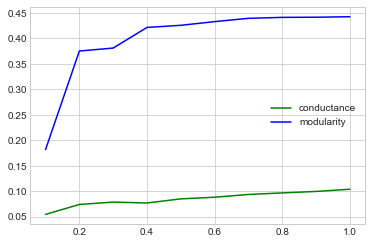

In [44]:
modularity_vs_conductance(G1, algorithms.rb_pots)

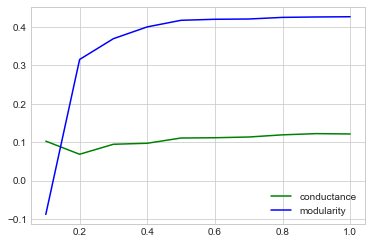

In [45]:
modularity_vs_conductance(G2, algorithms.rb_pots)

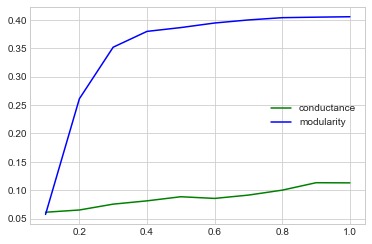

In [46]:
modularity_vs_conductance(G3, algorithms.rb_pots)

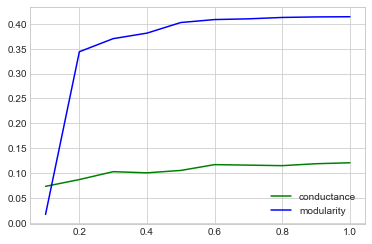

In [47]:
modularity_vs_conductance(G4, algorithms.rb_pots)

Best selection resolution_parameter:       
t1 = 0,8            
t2 = 0,6       
t3 = 0,6       
t4 = 0,5    

In [48]:
tc = TemporalClustering()
t = 1

for graph in g:
    resol_param = input("Give me resolution_parameter please: ")
    coms = algorithms.rb_pots(graph, weights='weight', resolution_parameter = float(resol_param))
    tc.add_clustering(coms, t)
    print(len(tc.get_clustering_at(t).communities))   
    t = t+1

Give me resolution_parameter please:  0.8


32


Give me resolution_parameter please:  0.6


28


Give me resolution_parameter please:  0.6


18


Give me resolution_parameter please:  0.5


23


In [49]:
trend = tc.clustering_stability_trend(evaluation.nf1)
trend

[0.008721113445378154, 0.010283068783068786, 0.02599378881987578]

In [50]:
tc.has_explicit_match()

False

In [51]:
jaccard = lambda x, y: len(set(x) & set(y)) / len(set(x) | set(y))

In [52]:
matches = tc.community_matching(jaccard, two_sided=True)

In [53]:
f"Example of community match: {matches[0]}"

"Example of community match: ('1_0', '2_1', 0.029661016949152543)"

In [54]:
com_polytree = tc.lifecycle_polytree(jaccard, two_sided=False)
print(com_polytree)

DiGraph with 101 nodes and 308 edges


In [55]:
weak_comp = list(nx.weakly_connected_components(com_polytree))[0]
x = com_polytree.copy()
x.remove_nodes_from([n for n in com_polytree.nodes() if n not in weak_comp])

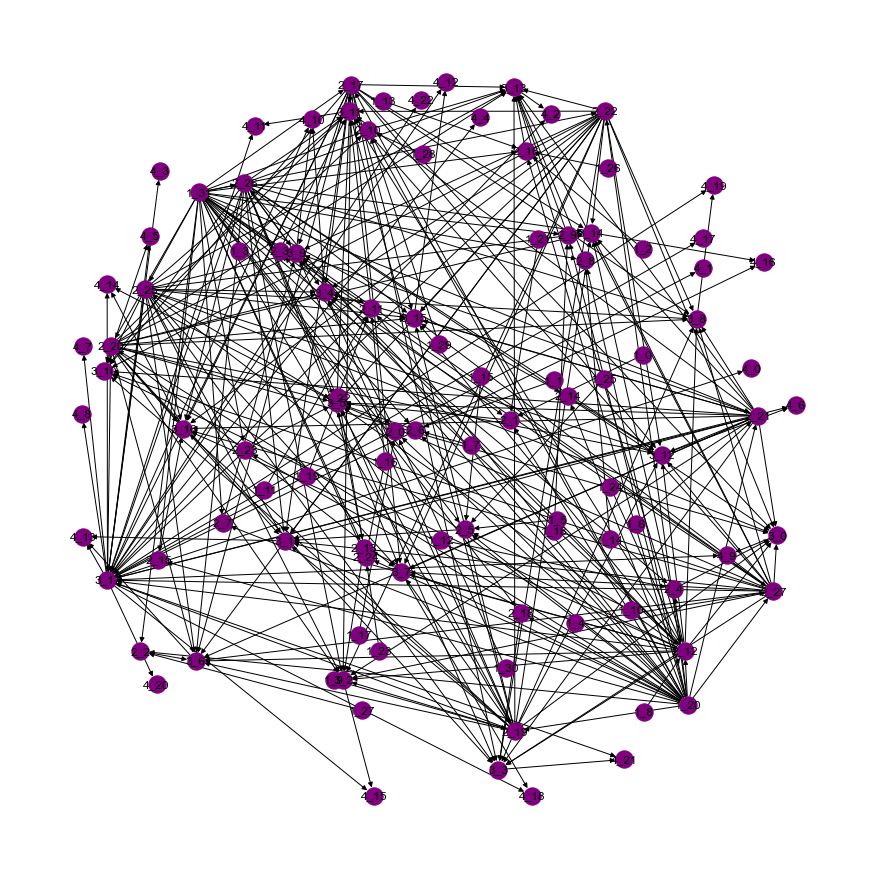

In [56]:
plt.figure(3,figsize=(12,12)) 
nx.draw(x, pos=nx.spring_layout(x), with_labels=True, node_color = "purple") 

In [57]:
nx.info(x)

'DiGraph with 101 nodes and 308 edges'

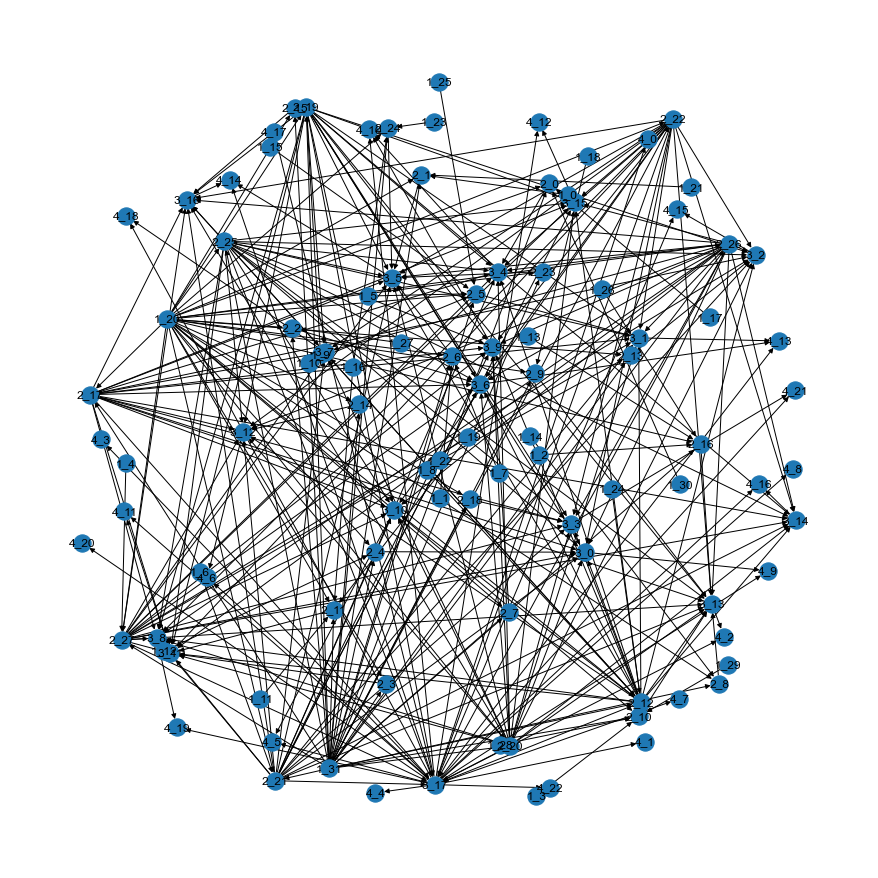

In [58]:
for nodes in nx.weakly_connected_components(com_polytree):
    sub =  com_polytree.subgraph(nodes)    
    plt.figure(3,figsize=(12,12)) 
    nx.draw(sub, pos=nx.spring_layout(sub), with_labels=True) 

In [59]:
tc.get_explicit_community_match()

In [60]:
list(nx.weakly_connected_components(com_polytree))

[{'1_0',
  '1_1',
  '1_10',
  '1_11',
  '1_12',
  '1_13',
  '1_14',
  '1_15',
  '1_16',
  '1_17',
  '1_18',
  '1_19',
  '1_2',
  '1_20',
  '1_21',
  '1_22',
  '1_23',
  '1_24',
  '1_25',
  '1_26',
  '1_27',
  '1_28',
  '1_29',
  '1_3',
  '1_30',
  '1_31',
  '1_4',
  '1_5',
  '1_6',
  '1_7',
  '1_8',
  '1_9',
  '2_0',
  '2_1',
  '2_10',
  '2_11',
  '2_12',
  '2_13',
  '2_14',
  '2_15',
  '2_16',
  '2_17',
  '2_18',
  '2_19',
  '2_2',
  '2_20',
  '2_21',
  '2_22',
  '2_23',
  '2_24',
  '2_25',
  '2_26',
  '2_27',
  '2_3',
  '2_4',
  '2_5',
  '2_6',
  '2_7',
  '2_8',
  '2_9',
  '3_0',
  '3_1',
  '3_10',
  '3_11',
  '3_12',
  '3_13',
  '3_14',
  '3_15',
  '3_16',
  '3_17',
  '3_2',
  '3_3',
  '3_4',
  '3_5',
  '3_6',
  '3_7',
  '3_8',
  '3_9',
  '4_0',
  '4_1',
  '4_10',
  '4_11',
  '4_12',
  '4_13',
  '4_14',
  '4_15',
  '4_16',
  '4_17',
  '4_18',
  '4_19',
  '4_2',
  '4_20',
  '4_21',
  '4_22',
  '4_3',
  '4_4',
  '4_5',
  '4_6',
  '4_7',
  '4_8',
  '4_9'}]